In [1]:
from instant_ack import *

%load_ext autoreload
%autoreload 2

2024-09-11 00:48:48.403 | INFO     | instant_ack.config:<module>:11 - PROJ_ROOT path is: /data/instant-ack


# Load data

In [2]:
df = cv.load_data("qlog", skip_missing=True)
df = cv.get_measurement(df, "first_pto")
df = df.filter(
    ~pl.col("scenario").str.contains("droplist"),
    pl.col("meta_name") == "all_latencies",
    pl.col("rtt") >= 1,
    pl.col("rtt") < 301,
)

# Validation: Check completeness of data.

Each line and RTT should have 100 repetitions

In [3]:
with pl.Config(tbl_rows=30):
    display(
        df.filter(pl.col("scenario").is_in(["goodput", "http3c"]))
        .group_by("rtt", "client", "scenario", "server_group")
        .len()
        .sort("rtt")
        .collect()
        .pivot(on="rtt", index=["scenario", "client", "server_group"])
        .sort("scenario", "client", "server_group")
    )
# neqo http3 WFC 12 ms RTT: One qlog file is cut short in the middle

scenario,client,server_group,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,60.0,70.0,80.0,90.0,100.0,110.0,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,250.0,260.0,270.0,280.0,290.0,300.0
str,str,str,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
"""goodput""","""aioquic""","""IACK""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""aioquic""","""WFC""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""go-x-net""","""IACK""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""go-x-net""","""WFC""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""mvfst""","""IACK""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""mvfst""","""WFC""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""neqo""","""IACK""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""neqo""","""WFC""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""ngtcp2""","""IACK""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100


# Statistics

In [4]:
pagg = (
    df.group_by("client", "server_group", "scenario", "rtt")
    .agg(pl.len(), pl.col("time_since_first_ms").median())
    .collect()
)

### IACK improvement: Section 4

In [5]:
# Result section introduction earlier IACK arrival
pagg.pivot(
    "server_group", index=["client", "scenario", "rtt"], values="time_since_first_ms"
).with_columns(diff=pl.col("WFC") - pl.col("IACK")).filter(
    # pl.col("client") != "go-x-net",
    pl.col("scenario")
    == "goodput"
).sort(
    "diff"
)

client,scenario,rtt,WFC,IACK,diff
str,str,f64,f64,f64,f64
"""go-x-net""","""goodput""",70.0,82.4855,82.391,0.0945
"""go-x-net""","""goodput""",90.0,108.069,107.03,1.039
"""go-x-net""","""goodput""",250.0,266.633,264.621,2.012
"""neqo""","""goodput""",100.0,111.463,108.6025,2.8605
"""go-x-net""","""goodput""",270.0,285.7995,282.8595,2.94
…,…,…,…,…,…
"""go-x-net""","""goodput""",260.0,281.76,274.084,7.676
"""mvfst""","""goodput""",120.0,173.503,165.688,7.815
"""go-x-net""","""goodput""",5.0,25.648,15.1715,10.4765


In [7]:
pagg.pivot(
    "server_group", index=["client", "scenario", "rtt"], values="time_since_first_ms"
).with_columns(diff=pl.col("WFC") - pl.col("IACK")).filter(
    pl.col("client") != "go-x-net", pl.col("scenario") == "http3c"
).sort(
    "diff"
)

client,scenario,rtt,WFC,IACK,diff
str,str,f64,f64,f64,f64
"""ngtcp2""","""http3c""",70.0,82.0,79.0,3.0
"""ngtcp2""","""http3c""",6.0,17.0,14.0,3.0
"""ngtcp2""","""http3c""",4.0,15.0,12.0,3.0
"""ngtcp2""","""http3c""",180.0,191.0,188.0,3.0
"""ngtcp2""","""http3c""",5.0,16.0,13.0,3.0
…,…,…,…,…,…
"""picoquic""","""http3c""",190.0,203.5495,198.259,5.2905
"""neqo""","""http3c""",200.0,213.865,208.5605,5.3045
"""picoquic""","""http3c""",210.0,223.776,218.236,5.54


# Use own PTO calculation based on RFC 9002

In [8]:
df_wfc = (
    df.filter(pl.col("server_group") == "WFC")
    .group_by(["server_group", "client", "scenario", "rtt"])
    .agg(pl.col("cc_pto").median())
    .collect()
)
df_wfc.head()

server_group,client,scenario,rtt,cc_pto
str,str,str,f64,f64
"""WFC""","""neqo""","""http3c""",110.0,392.1035
"""WFC""","""ngtcp2""","""http3c""",210.0,695.0
"""WFC""","""quic-go""","""http3c""",3.0,68.7725
"""WFC""","""mvfst""","""goodput""",7.0,79.769
"""WFC""","""quiche""","""http3c""",170.0,573.347


In [9]:
df_iack = (
    df.filter(pl.col("server_group") != "WFC")
    .group_by(["server_group", "client", "scenario", "rtt"])
    .agg(pl.col("cc_pto").median())
    .collect()
)
df_iack.head()

server_group,client,scenario,rtt,cc_pto
str,str,str,f64,f64
"""IACK""","""picoquic""","""goodput""",10.0,78.8675
"""IACK""","""mvfst""","""http3c""",20.0,108.3515
"""IACK""","""quic-go""","""goodput""",40.0,169.529
"""IACK""","""mvfst""","""goodput""",260.0,828.689
"""IACK""","""aioquic""","""goodput""",4.0,60.848


In [10]:
df_diff = df_wfc.join(
    df_iack, on=["client", "scenario", "rtt"], suffix="_iack"
).with_columns(
    (pl.col("cc_pto") - pl.col("cc_pto_iack")).alias("difference"),
    ((pl.col("cc_pto") - pl.col("cc_pto_iack")) / pl.col("rtt")).alias(
        "median_improvement_factor"
    ),
)
df_diff.head()

server_group,client,scenario,rtt,cc_pto,server_group_iack,cc_pto_iack,difference,median_improvement_factor
str,str,str,f64,f64,str,f64,f64,f64
"""WFC""","""picoquic""","""goodput""",10.0,91.478,"""IACK""",78.8675,12.6105,1.26105
"""WFC""","""mvfst""","""http3c""",20.0,119.4485,"""IACK""",108.3515,11.097,0.55485
"""WFC""","""quic-go""","""goodput""",40.0,180.287,"""IACK""",169.529,10.758,0.26895
"""WFC""","""mvfst""","""goodput""",260.0,839.2805,"""IACK""",828.689,10.5915,0.040737
"""WFC""","""aioquic""","""goodput""",4.0,71.129,"""IACK""",60.848,10.281,2.57025


In [11]:
iack_theo = cv.get_theoretical_improvement(
    3.3, range=np.arange(0.5, df_diff["rtt"].max(), 0.5)
)
iack_theo2 = cv.get_theoretical_improvement(
    6.8, range=np.arange(0.5, df_diff["rtt"].max(), 0.5)
)

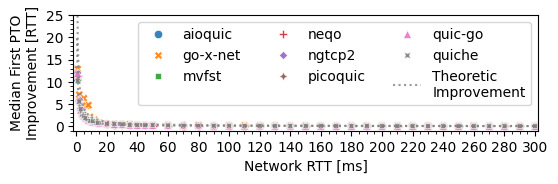

In [12]:
plot.scatter_improvement_factors(
    df_diff.filter(pl.col("scenario") == "goodput").sort("client"),
    iack_theo,
    iack_theo2,
    dest_file="sca_improvement-factor_at_RTT,source=RFC,goodput",
    ylim=(-1, 25),
    xlim=(-2, 302),
)

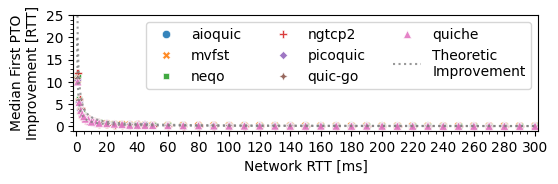

In [13]:
plot.scatter_improvement_factors(
    df_diff.filter(pl.col("scenario") == "http3c").sort("client"),
    iack_theo,
    iack_theo2,
    dest_file="sca_improvement-factor_at_RTT,source=RFC,http3",
    ylim=(-1, 25),
    xlim=(-2, 302),
)

# Use client information from Qlog

In [14]:
df_c = cv.load_data("qlog", skip_missing=True).filter(
    (pl.col("name") == "recovery:metrics_updated") | pl.col("cc_pto").is_not_null(),
    pl.col("rtt") > 0.95,
    pl.col("rtt") < 500,
)

df_c = cv.get_measurement(df_c, "all_latencies")

In [15]:
def calculate_pto_from_client_information(df):

    df = (
        df.filter(
            # Some implementations have an initial log, which contains the default informations, we remove those
            ~(
                (pl.col("client") == "quic-go")
                & (pl.col("data_smoothed_rtt") == 0)
                & (pl.col("data_rtt_variance") == 0)
            ),
            ~(
                (pl.col("client") == "quiche")
                & (pl.col("data_smoothed_rtt") == 333)
                & (pl.col("data_rtt_variance") == 166.5)
            ),
            ~(
                (pl.col("client") == "ngtcp2")
                & (pl.col("data_smoothed_rtt") == 100)
                & (pl.col("data_rtt_variance") == 50)
            ),
            pl.col("time_since_first_ms") != 0,
        )
        .with_columns(
            pl.col(
                [
                    "data_smoothed_rtt",
                    "data_rtt_variance",
                    "cc_smoothed_rtt",
                    "cc_rtt_var",
                    "cc_handshake_done",
                ]
            )
            .forward_fill()
            .over("file"),
        )
        .with_columns(
            pl.coalesce(["data_smoothed_rtt", "cc_smoothed_rtt"]).alias("smoothed_rtt"),
            pl.coalesce(["data_rtt_variance", "cc_rtt_var"]).alias("rtt_var"),
        )
        .with_columns(
            rtt_var_4=pl.col("rtt_var") * 4,
            cc_kGranularity=pl.lit(1),  # ms
            max_ack_delay=pl.when(pl.col("cc_handshake_done"))
            .then(pl.lit(26))
            .otherwise(pl.lit(0)),
        )
    )

    df = (
        df.filter(
            # Both must be non null
            pl.col("smoothed_rtt").is_not_null() & pl.col("rtt_var").is_not_null(),
            pl.col("name") == "recovery:metrics_updated",
        )
        .with_row_index("idx")
        .filter(
            # We consider an update when either data_smoothed_rtt changes or data_rtt_variance does so
            (pl.col("smoothed_rtt") != pl.col("smoothed_rtt").shift()).over("file")
            | (pl.col("rtt_var") != pl.col("rtt_var").shift()).over("file")
            | (pl.col("idx") == pl.col("idx").min().over("file")),
            # Must contain a client provided update
            pl.col("data_smoothed_rtt").is_not_null(),
        )
        .with_columns(
            pto=pl.col("smoothed_rtt")
            + pl.max_horizontal(["rtt_var_4", "cc_kGranularity"])
            + pl.col("max_ack_delay")
        )
    )

    return df


df_c = calculate_pto_from_client_information(df_c)

In [16]:
first = (
    df_c.with_row_index("id")
    .filter(
        pl.col("id") == pl.col("id").min().over("file"),
    )
    .collect()
)

### Validate the number of samples

In [17]:
with pl.Config(tbl_rows=30):
    display(
        first.filter(pl.col("scenario").is_in(["goodput", "http3c"]))
        .group_by("rtt", "client", "scenario", "server_group")
        .len()
        .sort("rtt")
        .pivot(on="rtt", index=["scenario", "client", "server_group"])
        .sort("scenario", "client", "server_group")
    )
# neqo similar issue as above
# quic-go does not log any RTT update for some repetitions of RTT >= 190, hence values below 100

scenario,client,server_group,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0,60.0,70.0,80.0,90.0,100.0,110.0,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,250.0,260.0,270.0,280.0,290.0,300.0
str,str,str,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
"""goodput""","""aioquic""","""IACK""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""aioquic""","""WFC""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""go-x-net""","""IACK""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""go-x-net""","""WFC""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""mvfst""","""IACK""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""mvfst""","""WFC""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""neqo""","""IACK""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""neqo""","""WFC""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
"""goodput""","""ngtcp2""","""IACK""",100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100


In [18]:
# Aggregate improvement
pagg = (
    first.group_by("client", "server_group", "scenario", "rtt")
    .agg(pl.col("pto").median())
    .pivot(on="server_group", index=["client", "scenario", "rtt"], values="pto")
    .with_columns(improvement=pl.col("WFC") - pl.col("IACK"))
    .with_columns(median_improvement_factor=pl.col("improvement") / pl.col("rtt"))
    .sort("client")
)
pagg.head()

client,scenario,rtt,WFC,IACK,improvement,median_improvement_factor
str,str,f64,f64,f64,f64,f64
"""aioquic""","""http3c""",4.0,45.604739,35.051137,10.553601,2.6384
"""aioquic""","""goodput""",4.0,45.225547,34.920587,10.304961,2.57624
"""aioquic""","""goodput""",210.0,633.735868,633.727757,0.008112,0.000039
"""aioquic""","""goodput""",130.0,426.984019,414.151401,12.832618,0.098712
"""aioquic""","""http3c""",160.0,513.725274,503.1809,10.544374,0.065902


### Median improvement factors

In [19]:
pagg.filter(
    # default PTO influences median improvement
    ~((pl.col("client") == "aioquic") & (pl.col("rtt") >= 190)),
    ~((pl.col("client") == "quic-go") & (pl.col("rtt") >= 190)),
    # Unreliable initialization of smoothed RTT
    ~(pl.col("client") == "go-x-net"),
).sort("improvement")

client,scenario,rtt,WFC,IACK,improvement,median_improvement_factor
str,str,f64,f64,f64,f64,f64
"""ngtcp2""","""goodput""",80.0,271.0,264.0,7.0,0.0875
"""ngtcp2""","""http3c""",8.0,55.0,48.0,7.0,0.875
"""ngtcp2""","""http3c""",180.0,571.0,564.0,7.0,0.038889
"""ngtcp2""","""goodput""",190.0,601.0,594.0,7.0,0.036842
"""ngtcp2""","""http3c""",220.0,691.0,684.0,7.0,0.031818
…,…,…,…,…,…,…
"""quiche""","""goodput""",190.0,613.507637,596.761105,16.746532,0.08814
"""quiche""","""goodput""",160.0,521.552027,503.969563,17.582464,0.10989
"""picoquic""","""http3c""",45.0,177.714,157.5465,20.1675,0.448167


### Median IACK improvement: Section 4.1, Appendix G, Figure 16

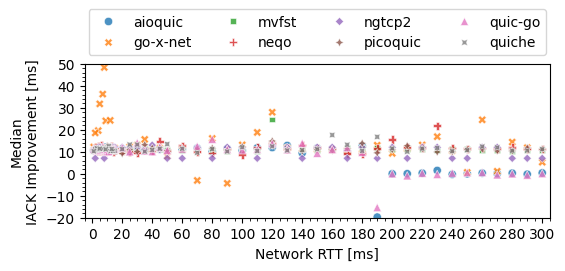

In [20]:
fig, ax = vh.fig_ax(figsize=(6, 2))

sns.scatterplot(
    pagg.filter(
        pl.col("scenario") == "goodput",
    ).sort("client"),
    y="improvement",
    x="rtt",
    hue="client",
    style="client",
    alpha=0.8,
)

ax.set(xlim=(-5, 305), ylim=(-20, 50))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.legend(title=None, ncol=4, loc="upper center", bbox_to_anchor=(0.5, 1.4))
ax.set(xlabel="Network RTT [ms]")
ax.set(ylabel="Median\nIACK Improvement [ms]")
vh.save_plot(fig, destination="interop-runner/sca_first_pto_improvement_goodput")
plt.show()

In [21]:
first.filter(
    pl.col("scenario") == "goodput", pl.col("client") == "aioquic", pl.col("rtt") == 280
).sort("rtt")

id,idx,data_initial_max_streams_bidi,data_initial_max_streams_uni,data_max_ack_delay,frame_sequence_number,frame_token,data_initial_max_data,index,frame_fin,data_ack_delay_exponent,frame_raw_error_code,common_fields_ODCID,name,frame_offset,data_initial_max_stream_data_bidi_remote,frame_id,frame_reset_token,frame_reason,frame_maximum,frame_retire_prior_to,data_initial_max_stream_data_bidi_local,frame_ack_delay,frame_stream_id,data_max_idle_timeout,data_owner,frame_length,data_active_connection_id_limit,data_initial_max_stream_data_uni,data_initial_source_connection_id,frame_error_code,frame_connection_id,frame_acked_ranges,frame_error_space,frame_frame_type,data_key_type,data_trigger,…,data_enable_time_stamp,data_handshake_connection_id,data_min_ack_delay,data_sni,data_proposed_alpn_0,data_header_payload_length,data_header_version,data_disable_migration,data_header_key_phase,data_pacing_rate,data_app_limited,data_ecn,data_header_dcil,data_header_scil,data_raw_payload_length,data_packets_in_flight,data_delta,data_event_type,data_packet_number_space,data_timer_type,data_key_phase,data_header_key_phase_bit,meta_title,meta_qlog_format,meta_trace_description,meta_trace_title,meta_trace_vantage_point_type,data_tls_cipher,meta_description,meta_trace_configuration_time_offset,meta_qlog_version,data_send_at_time,smoothed_rtt,rtt_var,rtt_var_4,max_ack_delay,pto
u32,u32,f64,f64,i64,str,str,f64,i64,str,i64,str,str,str,str,f64,str,str,str,str,str,f64,f64,str,i64,str,str,i64,f64,str,str,str,str,str,str,str,str,…,str,str,i64,str,str,i64,str,str,i64,i64,i64,str,i64,i64,i64,i64,f64,str,str,str,i64,str,str,str,str,str,str,str,str,i64,str,f64,f64,f64,f64,i32,f64
10825,61623,null,null,null,"""""","""""",null,0,"""""",null,"""""","""69a9611a05920a6a""","""recovery:metrics_updated""","""""",null,"""""","""""","""""","""""","""""",null,null,"""""",null,null,"""""",null,null,null,"""""","""""","""""","""""","""""",null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,281.501423,140.750711,563.002846,0,844.504269
10827,61636,null,null,null,"""""","""""",null,0,"""""",null,"""""","""471d5b35f8cf83cc""","""recovery:metrics_updated""","""""",null,"""""","""""","""""","""""","""""",null,null,"""""",null,null,"""""",null,null,null,"""""","""""","""""","""""","""""",null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,281.421875,140.710937,562.84375,0,844.265625
10829,61649,null,null,null,"""""","""""",null,0,"""""",null,"""""","""32323c4025c05a6f""","""recovery:metrics_updated""","""""",null,"""""","""""","""""","""""","""""",null,null,"""""",null,null,"""""",null,null,null,"""""","""""","""""","""""","""""",null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,281.412626,140.706313,562.825252,0,844.237878
10830,61661,null,null,null,"""""","""""",null,0,"""""",null,"""""","""a13eca43d53f1624""","""recovery:metrics_updated""","""""",null,"""""","""""","""""","""""","""""",null,null,"""""",null,null,"""""",null,null,null,"""""","""""","""""","""""","""""",null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,281.393828,140.696914,562.787656,0,844.181484
10832,61674,null,null,null,"""""","""""",null,0,"""""",null,"""""","""1ee6c470e9d7dbd2""","""recovery:metrics_updated""","""""",null,"""""","""""","""""","""""","""""",null,null,"""""",null,null,"""""",null,null,null,"""""","""""","""""","""""","""""",null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,281.30455,140.652275,562.6

In [22]:
pagg.filter(pl.col("scenario") == "goodput", pl.col("client") == "aioquic").sort("rtt")

client,scenario,rtt,WFC,IACK,improvement,median_improvement_factor
str,str,f64,f64,f64,f64,f64
"""aioquic""","""goodput""",1.0,35.991524,25.418349,10.573175,10.573175
"""aioquic""","""goodput""",2.0,39.586669,28.751619,10.83505,5.417525
"""aioquic""","""goodput""",3.0,42.38381,31.563966,10.819844,3.606615
"""aioquic""","""goodput""",4.0,45.225547,34.920587,10.304961,2.57624
"""aioquic""","""goodput""",5.0,50.584659,38.4968,12.08786,2.417572
…,…,…,…,…,…,…
"""aioquic""","""goodput""",260.0,784.637928,784.349806,0.288122,0.001108
"""aioquic""","""goodput""",270.0,814.451383,814.347059,0.104325,0.000386
"""aioquic""","""goodput""",280.0,844.108953,843.849147,0.259806,0.000928


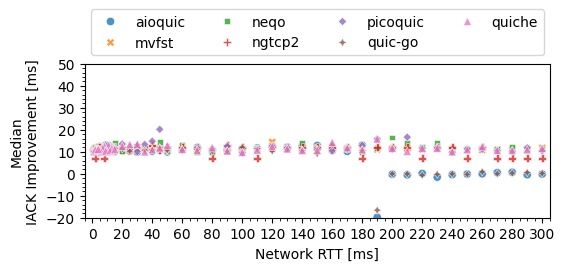

In [23]:
fig, ax = vh.fig_ax(figsize=(6, 2))

sns.scatterplot(
    pagg.filter(
        pl.col("scenario") == "http3c",
    ).sort("client"),
    y="improvement",
    x="rtt",
    hue="client",
    style="client",
    alpha=0.8,
)
ax.set(xlim=(-5, 305), ylim=(-20, 50))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.legend(title=None, ncol=4, loc="upper center", bbox_to_anchor=(0.5, 1.4))
ax.set(xlabel="Network RTT [ms]")
ax.set(ylabel="Median\nIACK Improvement [ms]")
vh.save_plot(fig, destination="interop-runner/sca_first_pto_improvement_http3")
plt.show()

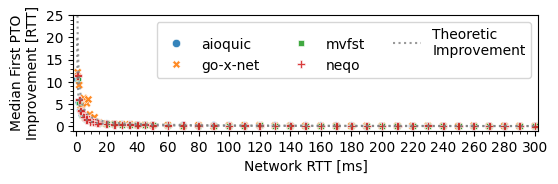

In [24]:
plot.scatter_improvement_factors(
    pagg.filter(
        pl.col("scenario") == "goodput",
        pl.col("client").is_in(["aioquic", "go-x-net", "mvfst", "neqo"]),
    ).sort("client"),
    iack_theo,
    iack_theo2,
    dest_file="interop-runner/sca_improvement-factor_at_RTT,source=client-1",
    ylim=(-1, 25),
    xlim=(-2, 302),
)

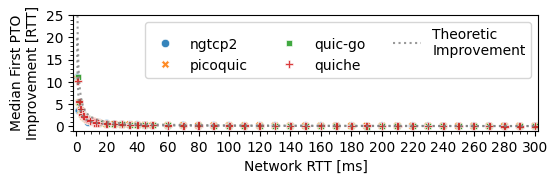

In [25]:
plot.scatter_improvement_factors(
    pagg.filter(
        pl.col("scenario") == "goodput",
        ~pl.col("client").is_in(["aioquic", "go-x-net", "mvfst", "neqo"]),
    ).sort("client"),
    iack_theo,
    iack_theo2,
    dest_file="interop-runner/sca_improvement-factor_at_RTT,source=client-2",
    ylim=(-1, 25),
    xlim=(-2, 302),
)